In [562]:
import pybroker as pyb
from datetime import datetime
from pybroker import ExecContext, Strategy, YFinance, StrategyConfig
import talib
from datetime import datetime , timedelta
import pandas as pd
import numpy as np

#pyb.enable_data_source_cache('rebalancing')
config = StrategyConfig(initial_cash=100_00)


In [563]:

def cmr(df, w):

#df = df.sort_values('Date')

# Calculate the daily return
 df['Daily Return'] = df['close'].pct_change()



# Calculate the rolling cumulative return for 60 days
 df['cmr'] = (1 + df['Daily Return']).rolling(window=w).apply(lambda x: x.prod(), raw=True) - 1

 return df[["date", "cmr"]]



def max_drawdown(df,w):
 
# Calculate the rolling maximum value over a 10-day window
#df = sqqq
 df['Rolling Max'] = df['adj_close'].rolling(window=w).max() - df["adj_close"]

# Calculate the drawdown as the percentage decline from the rolling maximum
 df['Drawdown'] = (df['adj_close'] - df['Rolling Max']) / df['Rolling Max']

# Calculate the maximum drawdown over the 10-day period
 max_drawdown = df['Drawdown'].min()

 return max_drawdown


def max_drawdown2(df,w):
 
# Calculate the rolling maximum value over a 10-day window
#df = sqqq
   Roll_Max = df['adj_close'].rolling(w).max()
   Daily_Drawdown = df['adj_close']/Roll_Max - 1.0

# Next we calculate the minimum (negative) daily drawdown in that window.
# Again, use min_periods=1 if you want to allow the expanding window
   Max_Daily_Drawdown = Daily_Drawdown.rolling(w).min()
   res_df = pd.DataFrame(Max_Daily_Drawdown)
   res_df.index = df["date"]
   #print(res_df)

   return res_df 


def calculate_max_drawdown(df,w):
    """
    Calculate the 10-day maximum drawdown of stock data.
    
    Parameters:
    - df: DataFrame containing the stock data, with 'close' column representing the closing prices.
    
    Returns:
    - max_drawdown_df: DataFrame containing the 10-day maximum drawdown values with corresponding dates.
    """
    rolling_max = df['adj_close'].rolling(window=w).max()  # Calculate the rolling maximum over a 10-day window
    drawdown = (df['adj_close'] - rolling_max) / rolling_max  # Calculate the drawdown as a percentage decline
    
    max_drawdown = drawdown.rolling(window=w, min_periods=1).min()  # Calculate the 10-day maximum drawdown
    
    max_drawdown_df = pd.DataFrame({'Date': df['date'], 'Max Drawdown': max_drawdown})
    max_drawdown_df.set_index('Date', inplace=True)
    
    return max_drawdown_df


def calculate_drawdown2(df,w):
   def cal_drawdown(prices):
    peak = prices.max()
    drawdown = (peak - prices[-1]) / peak
    return drawdown
    
   df.set_index('date', inplace=True)

# Sort the DataFrame by date in ascending order
#df.sort_index(ascending=True, inplace=True)

# Calculate the rolling 10-day maximum drawdown
   rolling_drawdown = df['adj_close'].rolling(window=10).apply(cal_drawdown, raw=False)

   return rolling_drawdown

   

   

 #return max_drawdown


def cmr2(df, w):
    """
    Calculate the 20-day cumulative return of stock data.
    
    Parameters:
    - df: DataFrame containing the stock data, with 'close' column representing the closing prices.
    
    Returns:
    - cumulative_return_df: DataFrame containing the 20-day cumulative return values with corresponding dates.
    """
    cumulative_return = (1 + df['open'].pct_change()).rolling(window=w).apply(lambda x: x.prod(), raw=True) - 1
    
    cumulative_return_df = pd.DataFrame({'date': df['date'], 'cmr': cumulative_return})
    cumulative_return_df.set_index('date', inplace=True)

    return cumulative_return_df


    # Calculate with close prices.
   

def cmr3(df, w):
   cumulative_returns_df = np.exp(np.log(df["adj_close"]+1).rolling(w).sum())-1
   return cumulative_returns_df

def cmr4(df,w):
 rolling_window = w
 df["return"] = df["adj_close"].pct_change()

# Calculate the rolling cumulative returns for each stock
 df["cmr"] = (1+df["return"]).rolling(window=rolling_window).apply(np.prod, raw=True) - 1
 #cmr = pd.DataFrame(cumulative_returns)

 df = df.set_index("date")

 #cmr["date"] = df["date"]
 #cmr = cmr.set_index("date")

# Print the DataFrame with the calculated rolling cumulative returns
 return df

def cmr5(df,w):
  x =  df["adj_close"].pct_change(periods=w, axis=0)
  x = pd.DataFrame(x)
  x["date"] = df["date"]
  x = x.set_index("date")
  return x
   

In [564]:
cmr5(bil,10)[0:20]

,adj_close
date,
2019-09-03,NaN
2019-09-04,NaN
2019-09-05,NaN
2019-09-06,NaN
2019-09-09,NaN
2019-09-10,NaN
2019-09-11,NaN
2019-09-12,NaN
2019-09-13,NaN


In [530]:
bil[0:20]

,date,symbol,open,high,low,close,volume,adj_close
0,2019-09-03,BIL,91.459999,91.459999,91.449997,91.459999,4842500,87.475349
1,2019-09-04,BIL,91.459999,91.459999,91.449997,91.449997,1895600,87.465775
2,2019-09-05,BIL,91.470001,91.470001,91.459999,91.459999,4888800,87.475349
3,2019-09-06,BIL,91.470001,91.480003,91.459999,91.470001,2094700,87.484909
4,2019-09-09,BIL,91.470001,91.480003,91.470001,91.470001,1064400,87.484909
5,2019-09-10,BIL,91.489998,91.489998,91.480003,91.489998,2325200,87.504028
6,2019-09-11,BIL,91.480003,91.489998,91.480003,91.480003,1437400,87.494469
7,2019-09-12,BIL,91.500000,91.510002,91.500000,91.500000,1867500,87.513596
8,2019-09-13,BIL,91.510002,91.510002,91.500000,91.500000,1638200,87.513596
9,2019-09-16,BIL,91.510002,91.519997,91.500000,91.500000,1119300,87.513596


In [565]:
spx=calculate_drawdown2(spy,10)

In [491]:
spx

date
2019-09-03         NaN
2019-09-04         NaN
2019-09-05         NaN
2019-09-06         NaN
2019-09-09         NaN
                ...   
2022-12-23    0.047416
2022-12-27    0.051173
2022-12-28    0.056935
2022-12-29    0.015887
2022-12-30    0.009839
Name: close, Length: 840, dtype: float64

In [566]:
bnd_s = cmr2(bnd,60)

bil_s1 = cmr2(bil,60)



In [567]:
spx

date
2019-09-03         NaN
2019-09-04         NaN
2019-09-05         NaN
2019-09-06         NaN
2019-09-09         NaN
                ...   
2022-12-23    0.043042
2022-12-27    0.046816
2022-12-28    0.052605
2022-12-29    0.011368
2022-12-30    0.009839
Name: adj_close, Length: 840, dtype: float64

In [504]:
bnd['cmr60'] = (bnd['adj_close'] / bnd['adj_close'].shift(60)) - 1


In [475]:
bnd_cmr.loc["2020-01-03"]["cmr"] 

-0.00859737752266021

In [505]:
bil['cmr60'] = (bil['adj_close'] / bil['adj_close'].shift(60)) - 1


In [538]:
#bil[bil["date"] == "2020-01-06"]["cmr60"] > 
bnd[bnd["date"] == "2020-01-06"]["cmr60"] 

KeyError: 'cmr60'

In [507]:
bil[bil["date"] == "2020-01-06"]["cmr60"] 

86    0.003624
Name: cmr60, dtype: float64

In [568]:

"""vixm =  yf.query("VIXM", start_date, end_date)
bnd =   yf.query("BND", start_date, end_date)
bil =   yf.query("BIL", start_date, end_date)
bil =   yf.query("TLT", start_date, end_date)
sqqq =  yf.query("SQQQ", start_date, end_date)
spy =   yf.query("SPY", start_date, end_date)

rsi_40 = pyb.indicator('Qrsi_40', lambda data: talib.RSI(data.close, timeperiod=40))
rsi_20 = pyb.indicator('rsi_20', lambda data: talib.RSI(data.close, timeperiod=20))

vixm_rsi = rsi_40(vixm)
bnd_cmr = cmr(bnd,60)
bil_cmr = cmr(bil,60)

tlt_cmr_20 = cmr(bnd,20)
bil_cmr_20 = cmr(bil,20)



sqqq_rsi_20 = rsi_20(sqqq)
config """

start_date = "01/01/20"
end_date = "01/01/23"
yf = YFinance()
start_date_temp = datetime.strptime(start_date, "%m/%d/%y")

# Convert start date string to datetime object

# Add 60 days

vixm_start_date = start_date_temp - timedelta(days=81)
bnd_start_date = start_date_temp - timedelta(days=120)
# Convert end date to string format
vixm_start_date = vixm_start_date.strftime("%m/%d/%Y")

bnd_start_date = bnd_start_date.strftime("%m/%d/%Y")

vixm = yf.query("VIXM",vixm_start_date , end_date)
bnd =  yf.query("BND", bnd_start_date, end_date)
bil =  yf.query("BIL", bnd_start_date, end_date)
tlt =  yf.query("TLT", bnd_start_date, end_date)
sqqq =  yf.query("SQQQ", bnd_start_date, end_date)
tbf =  yf.query( "TBF", bnd_start_date, end_date)
spy = yf.query("SPY", bnd_start_date, end_date)

rsi_40 = pyb.indicator('rsi_40', lambda data: talib.RSI(data.adj_close, timeperiod=40))
rsi_20 = pyb.indicator('rsi_20', lambda data: talib.RSI(data.adj_close, timeperiod=20))
rsi_10 = pyb.indicator('rsi_10', lambda data: talib.RSI(data.adj_close, timeperiod=10))

vixm_rsi = rsi_40(vixm)
bnd_cmr = cmr5(bnd,60)
bil_cmr = cmr5(bil,60)

tlt_cmr_20 = cmr5(bnd,20)
bil_cmr_20 = cmr5(bil,20)
#bil_cmr_20_2= calculate_20day_cumulative_return(bil)


sqqq_rsi_20 = rsi_20(sqqq)
tbf_rsi_20 = rsi_20(tbf)

vixm_rsi
vixm_rsi

#spy_draw_10 = calculate_drawdown2(spy,10)
#spy_draw_10_2 =  max_drawdown2(spy,10)
risk_on = ["TECL" ,"SOXL", "FAS" , "TQQQ" , "UPRO" , "TMF"]

rsis_10 = {}
for r in risk_on:
    d = yf.query(r,bnd_start_date , end_date)
    d1 = rsi_10(d)
    rsis_10[r] = d1


    

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.



In [552]:
bil

,date,symbol,open,high,low,close,volume,adj_close
0,2019-09-03,BIL,91.459999,91.459999,91.449997,91.459999,4842500,87.475349
1,2019-09-04,BIL,91.459999,91.459999,91.449997,91.449997,1895600,87.465775
2,2019-09-05,BIL,91.470001,91.470001,91.459999,91.459999,4888800,87.475349
3,2019-09-06,BIL,91.470001,91.480003,91.459999,91.470001,2094700,87.484909
4,2019-09-09,BIL,91.470001,91.480003,91.470001,91.470001,1064400,87.484909
...,...,...,...,...,...,...,...,...
835,2022-12-23,BIL,91.400002,91.410004,91.400002,91.410004,3683100,89.377258
836,2022-12-27,BIL,91.410004,91.419998,91.410004,91.410004,4267900,89.377258
837,2022-12-28,BIL,91.440002,91.440002,91.419998,91.440002,4123200,89.406578
838,2022-12-29,BIL,91.470001,91.480003,91.470001,91.480003,5637400,89.445694


In [601]:
alloc = {}

def set_target_shares(
    ctxs: dict[str, ExecContext],
    targets: dict[str, float]
):
    #print(ctxs)
    for symbol, target in targets.items():
        ctx = ctxs[symbol]
        target_shares = ctx.calc_target_shares(target)
        print(target_shares)
        pos = ctx.long_pos()
        if pos is None:
            ctx.buy_shares = target_shares
        elif pos.shares < target_shares:
            ctx.buy_shares = target_shares - pos.shares
        elif pos.shares > target_shares:
            ctx.sell_shares = pos.shares - target_shares


    #print(((ctxs["TSLA"]._curr_date)))
def shell(ctxs:dict[str, ExecContext]):
    #print(ctxs)
    pass
    

def buy_low(ctxs: dict[str, ExecContext]):
    # If shares were already purchased and are currently being held, then return.
    dt = tuple(ctxs.values())[0].dt
    #print(ctxs)

    date_object = datetime.strptime(str(dt), "%Y-%m-%d %H:%M:%S")

# Convert datetime object to the desired format
    dt2 = date_object.strftime("%Y-%m-%d")
    #print("Date is :", dt2)

    cur_vim_rsi = vixm_rsi.loc[dt2]
    #print("cur_vim is :", cur_vim_rsi)

    expected_alloc = {}
    for ct in ctxs.keys():
            expected_alloc[ct]=0

    if float(cur_vim_rsi) > 69:
        
        expected_alloc["SHY"] = 1.0

       
        #shares = ctxs["SHY"].calc_target_shares(1)
        #ctxs["SHY"].buy_shares = shares

    else:
        #print("not hit")
        #print(bnd_cmr[bnd_cmr["date"] == dt2]["cmr"].values[0])
        #print(bil_cmr[bil_cmr["date"] == dt2]["cmr"].values[0])
        if bnd_cmr.loc[dt2].values[0] > bil_cmr.loc[dt2].values[0]:
            #print("yes")
            risk_on = ["TECL" ,"SOXL", "FAS" , "TQQQ" , "UPRO" , "TMF"]
            rsis_here = {}
            for r in risk_on:
                rsi = rsis_10[r].loc[dt2]
                rsis_here[r] = rsi
            rsis_here = dict(sorted(rsis_here.items(), key=lambda x: x[1]))
            to_buy = list(rsis_here.keys())[:3]

            for t in to_buy:
                expected_alloc[t] = 0.33

            #for t in to_buy:
             #   shares = ctxs[t].calc_target_shares(0.33)
              #  ctxs[t].buy_shares =  shares 

                



        else:

            if tlt_cmr_20.loc[dt2].values[0] < bil_cmr_20.loc[dt2].values[0]:
                asset1 = "USDU"

                expected_alloc[asset1] =0.50

                #asset1_shares = ctxs[asset1].calc_target_shares(0.50)
                #ctxs[asset1].buy_shares = asset1_shares

                if sqqq_rsi_20.loc[dt2] < tbf_rsi_20.loc[dt2]:
                     #asset2_shares = ctxs["SQQQ"].calc_target_shares(0.50)
                     #ctxs["SQQQ"].buy_shares = asset1_shares
                     expected_alloc["SQQQ"] = 0.50

                else:
                    #asset2_shares = ctxs["TBF"].calc_target_shares(0.50)
                    #ctxs["TBF"].buy_shares = asset2_shares
                    expected_alloc["TBF"] = 0.50


                "RIsk off"
            else:
                "risk on "
                if spx.loc[dt2] < 0.05 :
                    #upro_n = ctxs["UPRO"].calc_target_shares(0.55)
                    #ctxs["UPRO"].buy_shares = upro_n
                    expected_alloc["UPRO"] = 0.55
                    expected_alloc["TMF"] = 0.45

                    #tmf_n = ctxs["TMF"].calc_target_shares(0.45)
                    #ctxs["TMF"].buy_shares = tmf_n

                else:
                    #iei_n = ctxs["IEI"].calc_target_shares(0.25)
                    #ctxs["IEI"].buy_shares  = iei_n
                    expected_alloc["IEI"] = 0.25
                    expected_alloc["GLD"] = 0.25
                    expected_alloc["TIP"] = 0.25
                    expected_alloc["BSV"] = 0.25
    
    print(expected_alloc)
    alloc[dt2] =  expected_alloc
    sold = []

    for symbol, target_alloc in expected_alloc.items():
        ctx = ctxs[symbol]
        target_shares = ctx.calc_target_shares(target_alloc)
        #print(target_shares)
        pos = ctx.long_pos()

        if pos:
         if pos.shares > target_shares:
            
            ctx.sell_shares = pos.shares - target_shares
            print(target_shares , "sold", symbol) 
            sold.append(symbol)

    for symbol, target_alloc in expected_alloc.items():
        if symbol not in sold:
            ctx = ctxs[symbol]
            target_shares = ctx.calc_target_shares(target_alloc)
            #print(target_shares)
            pos = ctx.long_pos()

            if not pos:
                ctx.buy_shares = target_shares
                
            elif pos.shares < target_shares:
                ctx.buy_shares = target_shares - pos.shares


                    




        
    


    #print(dt2)
    #for i,c in enumerate(ctxs.keys()):
        #print(c)
     #   if c == "TSLA":
      #      ctxs[c].buy_shares = 2
       #     print("Bought")
    

strategy = Strategy(YFinance(), start_date=start_date, end_date=end_date,config=config)
strategy.set_before_exec(buy_low)
strategy.add_execution(shell, ['SHY','TECL','SOXL','FAS','TQQQ', 'UPRO', 'TMF', 'USDU','SQQQ', 'TBF' , 'IEI', 'GLD', 'TIP', 'BSV'])

#strategy.add_execution(short_high, ['MSFT'])

result = strategy.backtest()




Backtesting: 2020-01-01 00:00:00 to 2023-01-01 00:00:00

Loaded cached bar data.

Test split: 2020-01-02 00:00:00 to 2022-12-30 00:00:00


  0% (0 of 756) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--
  2% (21 of 756) |                       | Elapsed Time: 0:00:00 ETA:  00:00:00
  5% (41 of 756) |#                      | Elapsed Time: 0:00:00 ETA:   0:00:01
  9% (71 of 756) |##                     | Elapsed Time: 0:00:00 ETA:   0:00:01


{'SHY': 0, 'BSV': 0, 'FAS': 0, 'UPRO': 0, 'SOXL': 0, 'USDU': 0.5, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0, 'TBF': 0, 'SQQQ': 0.5}
{'SHY': 0, 'BSV': 0, 'FAS': 0, 'UPRO': 0.55, 'SOXL': 0, 'USDU': 0, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0.45, 'TBF': 0, 'SQQQ': 0}
0 sold USDU
0 sold SQQQ
{'SHY': 0, 'BSV': 0, 'FAS': 0, 'UPRO': 0.55, 'SOXL': 0, 'USDU': 0, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0.45, 'TBF': 0, 'SQQQ': 0}
155 sold UPRO
{'SHY': 0, 'BSV': 0, 'FAS': 0, 'UPRO': 0.55, 'SOXL': 0, 'USDU': 0, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0.45, 'TBF': 0, 'SQQQ': 0}
{'SHY': 0, 'BSV': 0, 'FAS': 0.33, 'UPRO': 0, 'SOXL': 0.33, 'USDU': 0, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0.33, 'TBF': 0, 'SQQQ': 0}
0 sold UPRO
123 sold TMF
{'SHY': 0, 'BSV': 0, 'FAS': 0.33, 'UPRO': 0, 'SOXL': 0.33, 'USDU': 0, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0.33, 'TBF': 0, 'SQQQ': 0}
173 sold SOXL
{

 10% (81 of 756) |##                     | Elapsed Time: 0:00:00 ETA:   0:00:01


{'SHY': 0, 'BSV': 0, 'FAS': 0.33, 'UPRO': 0, 'SOXL': 0, 'USDU': 0, 'GLD': 0, 'TECL': 0.33, 'TQQQ': 0.33, 'IEI': 0, 'TIP': 0, 'TMF': 0, 'TBF': 0, 'SQQQ': 0}
129 sold FAS
0 sold SOXL
0 sold TMF
{'SHY': 0, 'BSV': 0, 'FAS': 0.33, 'UPRO': 0, 'SOXL': 0, 'USDU': 0, 'GLD': 0, 'TECL': 0.33, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0.33, 'TBF': 0, 'SQQQ': 0}
126 sold FAS
243 sold TECL
0 sold TQQQ
{'SHY': 0, 'BSV': 0, 'FAS': 0.33, 'UPRO': 0, 'SOXL': 0.33, 'USDU': 0, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0.33, 'TBF': 0, 'SQQQ': 0}
0 sold TECL
88 sold TMF
{'SHY': 0, 'BSV': 0, 'FAS': 0.33, 'UPRO': 0.33, 'SOXL': 0.33, 'USDU': 0, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0, 'TBF': 0, 'SQQQ': 0}
0 sold TMF
{'SHY': 0, 'BSV': 0, 'FAS': 0.33, 'UPRO': 0, 'SOXL': 0.33, 'USDU': 0, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0.33, 'TBF': 0, 'SQQQ': 0}
0 sold UPRO
480 sold SOXL
{'SHY': 0, 'BSV': 0, 'FAS': 0.33, 'UPRO': 0, 'SOXL': 0.33, 'USDU': 0, 'GLD': 0, 'TEC

 14% (111 of 756) |###                   | Elapsed Time: 0:00:00 ETA:   0:00:01
 18% (141 of 756) |####                  | Elapsed Time: 0:00:00 ETA:   0:00:01


140 sold FAS
434 sold SOXL
{'SHY': 0, 'BSV': 0, 'FAS': 0.33, 'UPRO': 0, 'SOXL': 0.33, 'USDU': 0, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0.33, 'TBF': 0, 'SQQQ': 0}
425 sold SOXL
{'SHY': 0, 'BSV': 0, 'FAS': 0.33, 'UPRO': 0, 'SOXL': 0.33, 'USDU': 0, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0.33, 'TBF': 0, 'SQQQ': 0}
90 sold TMF
{'SHY': 0, 'BSV': 0, 'FAS': 0.33, 'UPRO': 0.33, 'SOXL': 0.33, 'USDU': 0, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0, 'TBF': 0, 'SQQQ': 0}
0 sold TMF
{'SHY': 0, 'BSV': 0, 'FAS': 0.33, 'UPRO': 0.33, 'SOXL': 0, 'USDU': 0, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0.33, 'TBF': 0, 'SQQQ': 0}
0 sold SOXL
{'SHY': 0, 'BSV': 0, 'FAS': 0.33, 'UPRO': 0, 'SOXL': 0.33, 'USDU': 0, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0.33, 'TBF': 0, 'SQQQ': 0}
155 sold FAS
0 sold UPRO
{'SHY': 0, 'BSV': 0, 'FAS': 0.33, 'UPRO': 0, 'SOXL': 0.33, 'USDU': 0, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 

 23% (181 of 756) |#####                 | Elapsed Time: 0:00:00 ETA:   0:00:01
 27% (211 of 756) |######                | Elapsed Time: 0:00:00 ETA:   0:00:01


{'SHY': 0, 'BSV': 0, 'FAS': 0.33, 'UPRO': 0.33, 'SOXL': 0, 'USDU': 0, 'GLD': 0, 'TECL': 0, 'TQQQ': 0.33, 'IEI': 0, 'TIP': 0, 'TMF': 0, 'TBF': 0, 'SQQQ': 0}
0 sold TECL
231 sold TQQQ
{'SHY': 0, 'BSV': 0, 'FAS': 0.33, 'UPRO': 0.33, 'SOXL': 0, 'USDU': 0, 'GLD': 0, 'TECL': 0, 'TQQQ': 0.33, 'IEI': 0, 'TIP': 0, 'TMF': 0, 'TBF': 0, 'SQQQ': 0}
226 sold TQQQ
{'SHY': 0, 'BSV': 0, 'FAS': 0.33, 'UPRO': 0.33, 'SOXL': 0, 'USDU': 0, 'GLD': 0, 'TECL': 0, 'TQQQ': 0.33, 'IEI': 0, 'TIP': 0, 'TMF': 0, 'TBF': 0, 'SQQQ': 0}
212 sold FAS
259 sold UPRO
{'SHY': 0, 'BSV': 0, 'FAS': 0.33, 'UPRO': 0.33, 'SOXL': 0, 'USDU': 0, 'GLD': 0, 'TECL': 0, 'TQQQ': 0.33, 'IEI': 0, 'TIP': 0, 'TMF': 0, 'TBF': 0, 'SQQQ': 0}
229 sold TQQQ
{'SHY': 0, 'BSV': 0, 'FAS': 0.33, 'UPRO': 0.33, 'SOXL': 0, 'USDU': 0, 'GLD': 0, 'TECL': 0, 'TQQQ': 0.33, 'IEI': 0, 'TIP': 0, 'TMF': 0, 'TBF': 0, 'SQQQ': 0}
225 sold TQQQ
{'SHY': 0, 'BSV': 0, 'FAS': 0.33, 'UPRO': 0.33, 'SOXL': 0, 'USDU': 0, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TM

 31% (241 of 756) |#######               | Elapsed Time: 0:00:00 ETA:   0:00:01
 35% (271 of 756) |#######               | Elapsed Time: 0:00:00 ETA:   0:00:01


{'SHY': 0, 'BSV': 0, 'FAS': 0, 'UPRO': 0, 'SOXL': 0, 'USDU': 0.5, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0, 'TBF': 0, 'SQQQ': 0.5}
429 sold USDU
{'SHY': 0, 'BSV': 0, 'FAS': 0, 'UPRO': 0, 'SOXL': 0, 'USDU': 0.5, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0, 'TBF': 0, 'SQQQ': 0.5}
418 sold USDU
{'SHY': 0, 'BSV': 0, 'FAS': 0, 'UPRO': 0.55, 'SOXL': 0, 'USDU': 0, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0.45, 'TBF': 0, 'SQQQ': 0}
0 sold USDU
0 sold SQQQ
{'SHY': 0, 'BSV': 0, 'FAS': 0, 'UPRO': 0.55, 'SOXL': 0, 'USDU': 0, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0.45, 'TBF': 0, 'SQQQ': 0}
347 sold UPRO
{'SHY': 0, 'BSV': 0, 'FAS': 0.33, 'UPRO': 0, 'SOXL': 0, 'USDU': 0, 'GLD': 0, 'TECL': 0.33, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0.33, 'TBF': 0, 'SQQQ': 0}
0 sold UPRO
173 sold TMF
{'SHY': 0, 'BSV': 0, 'FAS': 0, 'UPRO': 0, 'SOXL': 0, 'USDU': 0.5, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0, 'TBF': 0, 'SQQQ':

 39% (301 of 756) |########              | Elapsed Time: 0:00:00 ETA:   0:00:01


{'SHY': 0, 'BSV': 0, 'FAS': 0, 'UPRO': 0, 'SOXL': 0, 'USDU': 0.5, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0, 'TBF': 0, 'SQQQ': 0.5}
456 sold USDU
{'SHY': 0, 'BSV': 0, 'FAS': 0, 'UPRO': 0, 'SOXL': 0, 'USDU': 0.5, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0, 'TBF': 0, 'SQQQ': 0.5}
452 sold USDU
{'SHY': 0, 'BSV': 0, 'FAS': 0, 'UPRO': 0, 'SOXL': 0, 'USDU': 0.5, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0, 'TBF': 0, 'SQQQ': 0.5}
449 sold USDU
{'SHY': 0, 'BSV': 0, 'FAS': 0, 'UPRO': 0, 'SOXL': 0, 'USDU': 0.5, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0, 'TBF': 0, 'SQQQ': 0.5}
169 sold SQQQ
{'SHY': 0, 'BSV': 0, 'FAS': 0, 'UPRO': 0, 'SOXL': 0, 'USDU': 0.5, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0, 'TBF': 0, 'SQQQ': 0.5}
466 sold USDU
{'SHY': 0, 'BSV': 0, 'FAS': 0, 'UPRO': 0, 'SOXL': 0, 'USDU': 0.5, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0, 'TBF': 0, 'SQQQ': 0.5}
454 sold USDU
{'SHY': 0,

 43% (331 of 756) |#########             | Elapsed Time: 0:00:00 ETA:   0:00:00
 47% (361 of 756) |##########            | Elapsed Time: 0:00:00 ETA:   0:00:00
 51% (391 of 756) |###########           | Elapsed Time: 0:00:00 ETA:   0:00:00
 55% (421 of 756) |############          | Elapsed Time: 0:00:00 ETA:   0:00:00


{'SHY': 0, 'BSV': 0, 'FAS': 0, 'UPRO': 0.55, 'SOXL': 0, 'USDU': 0, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0.45, 'TBF': 0, 'SQQQ': 0}
242 sold UPRO
{'SHY': 0, 'BSV': 0, 'FAS': 0, 'UPRO': 0.55, 'SOXL': 0, 'USDU': 0, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0.45, 'TBF': 0, 'SQQQ': 0}
{'SHY': 0, 'BSV': 0, 'FAS': 0, 'UPRO': 0.55, 'SOXL': 0, 'USDU': 0, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0.45, 'TBF': 0, 'SQQQ': 0}
239 sold UPRO
{'SHY': 0, 'BSV': 0, 'FAS': 0, 'UPRO': 0.55, 'SOXL': 0, 'USDU': 0, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0.45, 'TBF': 0, 'SQQQ': 0}
443 sold TMF
{'SHY': 0, 'BSV': 0, 'FAS': 0, 'UPRO': 0.55, 'SOXL': 0, 'USDU': 0, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0.45, 'TBF': 0, 'SQQQ': 0}
{'SHY': 0, 'BSV': 0, 'FAS': 0, 'UPRO': 0.55, 'SOXL': 0, 'USDU': 0, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0.45, 'TBF': 0, 'SQQQ': 0}
434 sold TMF
{'SHY': 0, 'BSV': 0, 'FAS': 

 60% (461 of 756) |#############         | Elapsed Time: 0:00:00 ETA:   0:00:00
 64% (491 of 756) |##############        | Elapsed Time: 0:00:01 ETA:   0:00:00
 68% (521 of 756) |###############       | Elapsed Time: 0:00:01 ETA:   0:00:00
 72% (551 of 756) |################      | Elapsed Time: 0:00:01 ETA:   0:00:00


 sold USDU
{'SHY': 0, 'BSV': 0, 'FAS': 0, 'UPRO': 0, 'SOXL': 0, 'USDU': 0.5, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0, 'TBF': 0, 'SQQQ': 0.5}
{'SHY': 0, 'BSV': 0, 'FAS': 0, 'UPRO': 0, 'SOXL': 0, 'USDU': 0.5, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0, 'TBF': 0, 'SQQQ': 0.5}
522 sold USDU
{'SHY': 0, 'BSV': 0, 'FAS': 0, 'UPRO': 0, 'SOXL': 0, 'USDU': 0.5, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0, 'TBF': 0, 'SQQQ': 0.5}
364 sold SQQQ
{'SHY': 0, 'BSV': 0, 'FAS': 0, 'UPRO': 0, 'SOXL': 0, 'USDU': 0.5, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0, 'TBF': 0, 'SQQQ': 0.5}
520 sold USDU
{'SHY': 0, 'BSV': 0, 'FAS': 0, 'UPRO': 0, 'SOXL': 0, 'USDU': 0.5, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0, 'TBF': 0, 'SQQQ': 0.5}
518 sold USDU
{'SHY': 0, 'BSV': 0, 'FAS': 0, 'UPRO': 0.55, 'SOXL': 0, 'USDU': 0, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0.45, 'TBF': 0, 'SQQQ': 0}
0 sold USDU
0 sold SQQQ
{

 78% (591 of 756) |#################     | Elapsed Time: 0:00:01 ETA:   0:00:00


{'SHY': 0, 'BSV': 0, 'FAS': 0, 'UPRO': 0, 'SOXL': 0, 'USDU': 0.5, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0, 'TBF': 0, 'SQQQ': 0.5}
668 sold USDU
0 sold TBF
{'SHY': 0, 'BSV': 0, 'FAS': 0, 'UPRO': 0, 'SOXL': 0, 'USDU': 0.5, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0, 'TBF': 0, 'SQQQ': 0.5}
651 sold USDU
{'SHY': 0, 'BSV': 0, 'FAS': 0, 'UPRO': 0, 'SOXL': 0, 'USDU': 0.5, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0, 'TBF': 0, 'SQQQ': 0.5}
389 sold SQQQ
{'SHY': 0, 'BSV': 0, 'FAS': 0, 'UPRO': 0, 'SOXL': 0, 'USDU': 0.5, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0, 'TBF': 0, 'SQQQ': 0.5}
675 sold USDU
{'SHY': 0, 'BSV': 0, 'FAS': 0, 'UPRO': 0, 'SOXL': 0, 'USDU': 0.5, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0, 'TBF': 0, 'SQQQ': 0.5}
400 sold SQQQ
{'SHY': 0, 'BSV': 0, 'FAS': 0, 'UPRO': 0, 'SOXL': 0, 'USDU': 0.5, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0, 'TBF': 0, 'SQQQ': 0.5}
643 sold USDU

 82% (621 of 756) |##################    | Elapsed Time: 0:00:01 ETA:   0:00:00
 86% (651 of 756) |##################    | Elapsed Time: 0:00:01 ETA:   0:00:00
 91% (691 of 756) |####################  | Elapsed Time: 0:00:01 ETA:   0:00:00


{'SHY': 0, 'BSV': 0, 'FAS': 0, 'UPRO': 0, 'SOXL': 0, 'USDU': 0.5, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0, 'TBF': 0, 'SQQQ': 0.5}
388 sold SQQQ
{'SHY': 0, 'BSV': 0, 'FAS': 0, 'UPRO': 0, 'SOXL': 0, 'USDU': 0.5, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0, 'TBF': 0, 'SQQQ': 0.5}
369 sold SQQQ
{'SHY': 0, 'BSV': 0, 'FAS': 0, 'UPRO': 0, 'SOXL': 0, 'USDU': 0.5, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0, 'TBF': 0, 'SQQQ': 0.5}
722 sold USDU
{'SHY': 0, 'BSV': 0, 'FAS': 0, 'UPRO': 0, 'SOXL': 0, 'USDU': 0.5, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0, 'TBF': 0.5, 'SQQQ': 0}
0 sold SQQQ
{'SHY': 0, 'BSV': 0, 'FAS': 0, 'UPRO': 0, 'SOXL': 0, 'USDU': 0.5, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0, 'TBF': 0.5, 'SQQQ': 0}
{'SHY': 0, 'BSV': 0, 'FAS': 0, 'UPRO': 0, 'SOXL': 0, 'USDU': 0.5, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0, 'TBF': 0, 'SQQQ': 0.5}
0 sold TBF
{'SHY': 0, 'BSV': 0, 'FAS': 0

 96% (731 of 756) |##################### | Elapsed Time: 0:00:01 ETA:   0:00:00
100% (756 of 756) |######################| Elapsed Time: 0:00:01 Time:  0:00:01


{'SHY': 0, 'BSV': 0, 'FAS': 0, 'UPRO': 0, 'SOXL': 0, 'USDU': 0.5, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0, 'TBF': 0, 'SQQQ': 0.5}
653 sold SQQQ
{'SHY': 0, 'BSV': 0, 'FAS': 0, 'UPRO': 0, 'SOXL': 0, 'USDU': 0.5, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0, 'TBF': 0, 'SQQQ': 0.5}
637 sold SQQQ
{'SHY': 0, 'BSV': 0, 'FAS': 0, 'UPRO': 0, 'SOXL': 0, 'USDU': 0.5, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0, 'TBF': 0, 'SQQQ': 0.5}
1305 sold USDU
{'SHY': 0, 'BSV': 0, 'FAS': 0, 'UPRO': 0, 'SOXL': 0, 'USDU': 0.5, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0, 'TBF': 0, 'SQQQ': 0.5}
1285 sold USDU
{'SHY': 0, 'BSV': 0, 'FAS': 0, 'UPRO': 0, 'SOXL': 0, 'USDU': 0.5, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0, 'TBF': 0, 'SQQQ': 0.5}
1275 sold USDU
{'SHY': 0, 'BSV': 0, 'FAS': 0, 'UPRO': 0, 'SOXL': 0, 'USDU': 0.5, 'GLD': 0, 'TECL': 0, 'TQQQ': 0, 'IEI': 0, 'TIP': 0, 'TMF': 0, 'TBF': 0, 'SQQQ': 0.5}
643 sold SQQQ
{'SHY':

In [606]:
import nasdaqdatalink
mydata = nasdaqdatalink.get("BIL")

mydata

SyntaxError: Invalid format used for Nasdaq Data Link database code.         The correct format is: `DATABASE_CODE/DATASET_CODE` (<string>)

In [195]:
pd.DataFrame(alloc).T.to_csv("trades_hedgefundies.csv")

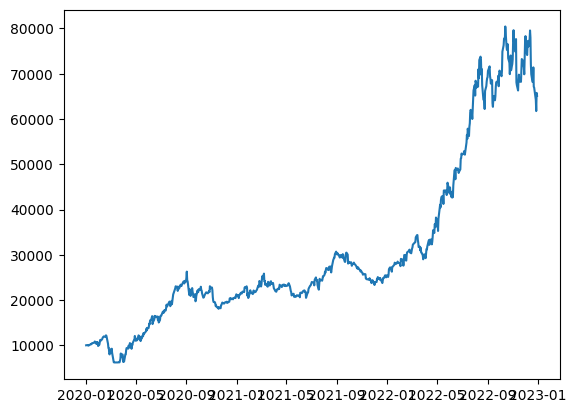

In [633]:
import matplotlib.pyplot as plt
chart = plt.subplot2grid((3, 2), (0, 0), rowspan=3, colspan=2)
chart.plot(result.portfolio.index, result.portfolio['market_value'])




In [603]:
result.portfolio

,cash,equity,margin,market_value,pnl,unrealized_pnl,fees
date,,,,,,,
2020-01-02,10000.00,10000.00,0.0,10000.00,0.00,0.0,0.0
2020-01-03,110.50,10021.63,0.0,10021.63,21.63,0.0,0.0
2020-01-06,79.48,10047.22,0.0,10047.22,47.22,0.0,0.0
2020-01-07,32.86,9932.21,0.0,9932.21,-67.79,0.0,0.0
2020-01-08,6.01,9931.11,0.0,9931.11,-68.89,0.0,0.0
...,...,...,...,...,...,...,...
2022-12-23,416.59,66945.43,0.0,66945.43,56945.43,0.0,0.0
2022-12-27,699.53,64222.92,0.0,64222.92,54222.92,0.0,0.0
2022-12-28,389.39,61752.37,0.0,61752.37,51752.37,0.0,0.0


In [608]:
from pybroker import Alpaca

alpaca = Alpaca("PK2C84XP8XIO9HFLVVPU", "beFPSKILWRgIVrFir1hmzVxcpMxnk9tbjKoLKaOf")


In [628]:
df = alpaca.query(
    ['BND'],
    start_date='09/03/2019',
    end_date='1/1/2023',
    timeframe='1d'
)
df

Loaded cached bar data.



,date,symbol,open,high,low,close,volume,adj_close
0,2019-09-03,BND,84.980003,85.180000,84.839996,84.989998,3345800,77.436897
1,2019-09-04,BND,84.970001,85.160004,84.949997,85.150002,2864100,77.582672
2,2019-09-05,BND,84.849998,84.900002,84.580002,84.709999,3162800,77.181778
3,2019-09-06,BND,84.760002,84.849998,84.720001,84.809998,2764600,77.272911
4,2019-09-09,BND,84.470001,84.550003,84.400002,84.419998,2618400,76.917557
...,...,...,...,...,...,...,...,...
835,2022-12-23,BND,72.500000,72.620003,72.449997,72.529999,4693400,71.474113
836,2022-12-27,BND,72.129997,72.230003,71.959999,71.970001,6959600,70.922272
837,2022-12-28,BND,72.120003,72.180000,71.860001,71.870003,7868200,70.823730
838,2022-12-29,BND,71.970001,72.169998,71.949997,72.139999,7391000,71.089798


In [631]:
close1 = df["adj_close"]
close2 = bnd["adj_close"]

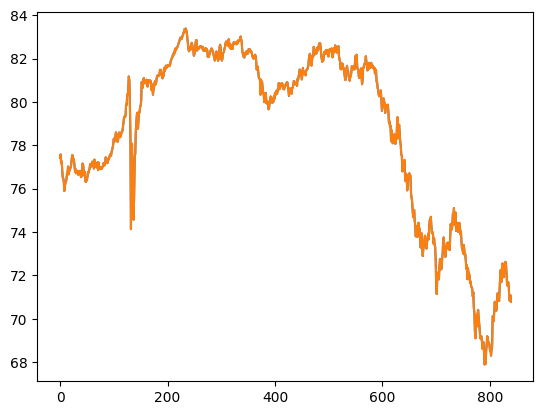

In [632]:
plt.plot(close1)
plt.plot(close2)

<Axes: >

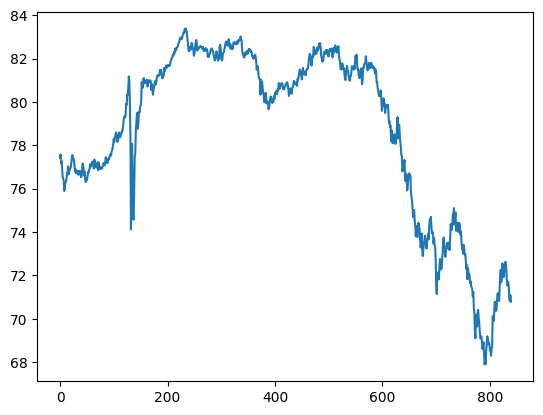

In [630]:
#plt.plot(close1)
bnd["adj_close"].plot()

<Axes: >

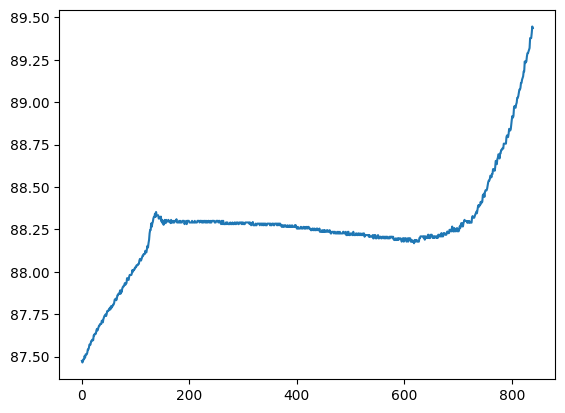

In [614]:
bil["close"].plot()

In [48]:
import pandas as pd

# Assuming you have a DataFrame named 'df' with a 'Date' column and 'Close' column

# Sort the DataFrame by date (if not already sorted)

import pandas as pd

# Assuming you have a DataFrame named 'df' with a 'Date' column and 'Price' column

# Calculate the rolling maximum value over a 10-day window
df = sqqq
df['Rolling Max'] = df['close'].rolling(window=10).max()

# Calculate the drawdown as the percentage decline from the rolling maximum
df['Drawdown'] = (df['close'] - df['Rolling Max']) / df['Rolling Max']

# Calculate the maximum drawdown over the 10-day period
max_drawdown = df['Drawdown'].min()

In [58]:
Roll_Max = sqqq['close'].rolling(10).max()
Daily_Drawdown = sqqq['close']/Roll_Max - 1.0

# Next we calculate the minimum (negative) daily drawdown in that window.
# Again, use min_periods=1 if you want to allow the expanding window
Max_Daily_Drawdown = Daily_Drawdown.rolling(10).min()
df = pd.DataFrame(Max_Daily_Drawdown, index=sqqq["date"])

return df 



,close
date,
2017-01-03,NaN
2017-01-04,NaN
2017-01-05,NaN
2017-01-06,NaN
2017-01-09,NaN
...,...
2020-12-24,NaN
2020-12-28,NaN
2020-12-29,NaN


In [226]:
df = result.positions.reset_index()

df[df["date"]=="2022-12-30"]

,symbol,date,long_shares,short_shares,close,equity,market_value,margin,unrealized_pnl
1799,SOXL,2022-12-30,1412,0,9.67,13654.04,13654.04,0.0,409.48
1800,TQQQ,2022-12-30,789,0,17.30,13649.70,13649.70,0.0,-3519.26
1801,TMF,2022-12-30,1733,0,7.62,13205.46,13205.46,0.0,-205.41


In [594]:
alloc

{'2020-01-02': {'SHY': 0,
  'BSV': 0,
  'FAS': 0,
  'UPRO': 0,
  'SOXL': 0,
  'USDU': 0.5,
  'GLD': 0,
  'TECL': 0,
  'TQQQ': 0,
  'IEI': 0,
  'TIP': 0,
  'TMF': 0,
  'TBF': 0,
  'SQQQ': 0.5},
 '2020-01-03': {'SHY': 0,
  'BSV': 0,
  'FAS': 0,
  'UPRO': 0.55,
  'SOXL': 0,
  'USDU': 0,
  'GLD': 0,
  'TECL': 0,
  'TQQQ': 0,
  'IEI': 0,
  'TIP': 0,
  'TMF': 0.45,
  'TBF': 0,
  'SQQQ': 0},
 '2020-01-06': {'SHY': 0,
  'BSV': 0,
  'FAS': 0,
  'UPRO': 0.55,
  'SOXL': 0,
  'USDU': 0,
  'GLD': 0,
  'TECL': 0,
  'TQQQ': 0,
  'IEI': 0,
  'TIP': 0,
  'TMF': 0.45,
  'TBF': 0,
  'SQQQ': 0},
 '2020-01-07': {'SHY': 0,
  'BSV': 0,
  'FAS': 0,
  'UPRO': 0.55,
  'SOXL': 0,
  'USDU': 0,
  'GLD': 0,
  'TECL': 0,
  'TQQQ': 0,
  'IEI': 0,
  'TIP': 0,
  'TMF': 0.45,
  'TBF': 0,
  'SQQQ': 0},
 '2020-01-08': {'SHY': 0,
  'BSV': 0,
  'FAS': 0.33,
  'UPRO': 0,
  'SOXL': 0.33,
  'USDU': 0,
  'GLD': 0,
  'TECL': 0,
  'TQQQ': 0,
  'IEI': 0,
  'TIP': 0,
  'TMF': 0.33,
  'TBF': 0,
  'SQQQ': 0},
 '2020-01-09': {'SHY': 0

In [57]:
Max_Daily_Drawdown.min()

-0.4123951537744641

In [150]:
alloc

{'2020-01-02': {'SHY': 0,
  'BSV': 0,
  'FAS': 0,
  'UPRO': 0,
  'SOXL': 0,
  'USDU': 0.5,
  'GLD': 0,
  'TECL': 0,
  'TQQQ': 0,
  'IEI': 0,
  'TIP': 0,
  'TMF': 0,
  'TBF': 0,
  'SQQQ': 0.5},
 '2020-01-03': {'SHY': 0,
  'BSV': 0,
  'FAS': 0,
  'UPRO': 0.55,
  'SOXL': 0,
  'USDU': 0,
  'GLD': 0,
  'TECL': 0,
  'TQQQ': 0,
  'IEI': 0,
  'TIP': 0,
  'TMF': 0.45,
  'TBF': 0,
  'SQQQ': 0},
 '2020-01-06': {'SHY': 0,
  'BSV': 0,
  'FAS': 0,
  'UPRO': 0.55,
  'SOXL': 0,
  'USDU': 0,
  'GLD': 0,
  'TECL': 0,
  'TQQQ': 0,
  'IEI': 0,
  'TIP': 0,
  'TMF': 0.45,
  'TBF': 0,
  'SQQQ': 0},
 '2020-01-07': {'SHY': 0,
  'BSV': 0,
  'FAS': 0,
  'UPRO': 0.55,
  'SOXL': 0,
  'USDU': 0,
  'GLD': 0,
  'TECL': 0,
  'TQQQ': 0,
  'IEI': 0,
  'TIP': 0,
  'TMF': 0.45,
  'TBF': 0,
  'SQQQ': 0},
 '2020-01-08': {'SHY': 0,
  'BSV': 0,
  'FAS': 0,
  'UPRO': 0,
  'SOXL': 0,
  'USDU': 0.5,
  'GLD': 0,
  'TECL': 0,
  'TQQQ': 0,
  'IEI': 0,
  'TIP': 0,
  'TMF': 0,
  'TBF': 0,
  'SQQQ': 0.5},
 '2020-01-09': {'SHY': 0,
  '

In [39]:
cmr(vixm).set_index("date").loc["2020-12-28"].values[0]

-0.11475010679671305